# Appendix

In [1]:
# Prevent Warnings
import warnings
warnings.filterwarnings('ignore')

#import required modules
import pandas as pd
import pandas.plotting as pp
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats import weightstats as ws
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import patsy

#display graph inline
%matplotlib inline

## Custom Functions

In [2]:
#function that returns count, mean, standard deviation and variation 
def bStats(_x):
    x_co = _x.count()
    x_mu = _x.mean()
    x_sigma = _x.std()
    x_omega = _x.var()
    return x_co, x_mu, x_sigma, x_omega 

In [3]:
#function to plot distrobution plot using seaborn distplot
def bPlot(_x1, _x2):
    fig = plt.figure(figsize=(10,6))

    sns.distplot(_x1, bins=10, kde_kws={"color": "b", "lw": 1},
             hist_kws={"histtype": "bar", "linewidth": 1, "color": "b"}, label='_men')

    sns.distplot(_x2, bins=10, kde_kws={"color": "g", "lw": 1},
            hist_kws={"histtype": "bar", "linewidth": 1, "color": "g"}, label='_women')

    plt.show()

In [4]:
#function to plot Receiver Operating Characteristic ROC
def rocPlot(_t, _p):
    _ra = roc_auc_score(_t, _p)
    _fp, _tp, thresholds = roc_curve(_t, _p)
    plt.figure(figsize=(5,5))
    plt.plot(_fp, _tp, label='Logistic Regression (area = %0.4f)' % _ra)
    plt.plot([0, 1], [0, 1],'g--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="upper left")
    plt.show()

## Data prep

In [5]:
#create dataframe
_df = pd.read_csv('heart.csv')

In [6]:
#review data types
_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
_df.shape

(303, 14)

In [8]:
#review data
_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


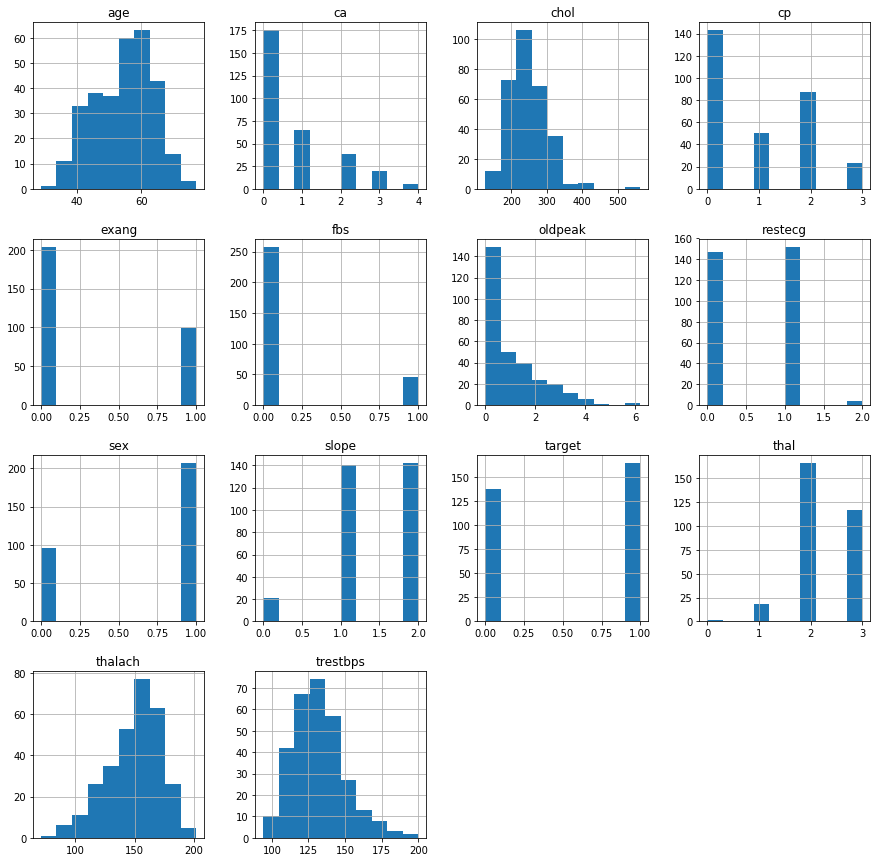

In [9]:
#plot histograms 
_df.hist(figsize=(15,15))
plt.show()

## Hypothesis Testing

### Create data set

In [10]:
#create two data set of cholesterol for both men and women
_men = _df.chol[_df.sex == 1].sample(n=80, random_state=7)

_women = _df.chol[_df.sex == 0].sample(n=80, random_state=7)

### Get statistical information and plot with outliers

In [11]:
#get the count, mean, standard deviation and variance for men and print
men_co, men_mu, men_sigma, men_omega = bStats(_men)

print('men_co =',men_co,'\nmen_mu =',men_mu, '\nmen_sigma =',
      men_sigma,'\nmen_omega =', men_omega)

men_co = 80 
men_mu = 243.3125 
men_sigma = 38.81882413977704 
men_omega = 1506.9011075949368


In [12]:
#get the count, mean, standard deviation and variance for women and print
women_co, women_mu, women_sigma, women_omega = bStats(_women)

print('women_co',women_co,'\nwomen_mu =',women_mu, '\nwomen_sigma =',
      women_sigma,'\nwomen_omega =', women_omega)

women_co 80 
women_mu = 263.4875 
women_sigma = 68.51406466530814 
women_omega = 4694.177056962025


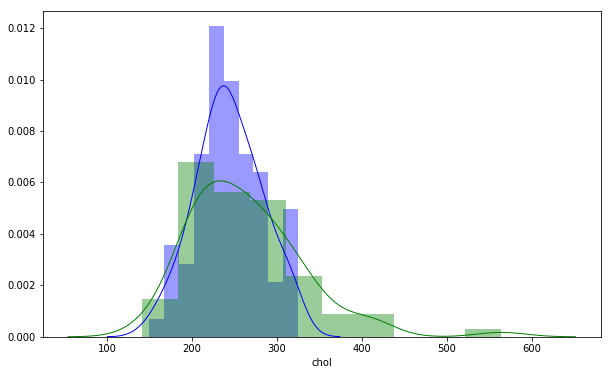

In [13]:
bPlot(_men, _women)

In [14]:
#two indepenten t tests
_t, _p = ss.ttest_ind(_women,_men, equal_var=False)
print('pvalue =',_p,'\nt statistic =', _t)

pvalue = 0.023606515112810044 
t statistic = 2.291526764449937


## Logistic Regression
#### Using Scikit-Learn

In [15]:
#import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import model_selection as ms
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [16]:
_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#create a copy of the dataframe _df
_dr = _df.copy()
#delete dataframe _df
del _df

In [18]:
#drop unwanted columns
_dr.drop(columns=['sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], inplace=True)

In [19]:
_dr.head()

,age,chol,target
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1


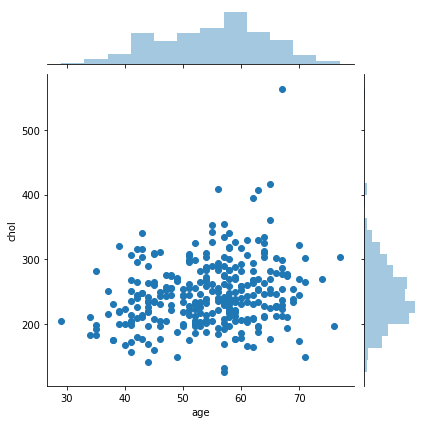

In [20]:
#scatter plot of cholesterol to age
sns.jointplot(y=_dr.chol, x=_dr.age, data=_dr)

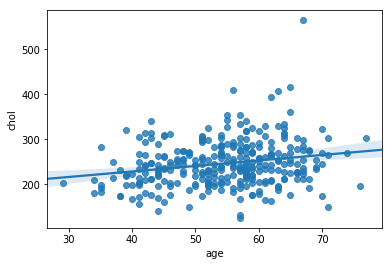

In [21]:
#regression plot of cholesterol to age
sns.regplot(y=_dr.chol, x=_dr.age, data=_dr, fit_reg=True)

#### Create Logistis Regression with sklearn

In [22]:
#one-third of data as a part of test set
_v_size = 0.33
#set seed
seed = 7

#init linear regression
clf = LogisticRegression()

#split-out validation dataset
_a = _dr.values
_x = _a[:,0:2]
_y = _a[:,2] 

#split data
X_t, X_v, Y_t, Y_v = train_test_split(_x, _y, test_size=_v_size, random_state=seed)

#fitting the training set
clf.fit(X_t, Y_t) 

#predicting for the Test(Validation) Set
pred_clf = clf.predict(X_v)
print(pred_clf)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1]


In [23]:
#print truth table
print(confusion_matrix(Y_v,pred_clf))

[[ 6 42]
 [ 2 50]]


In [24]:
_ra = roc_auc_score(Y_v, pred_clf)
print('Area =',_ra)

Area = 0.5432692307692308


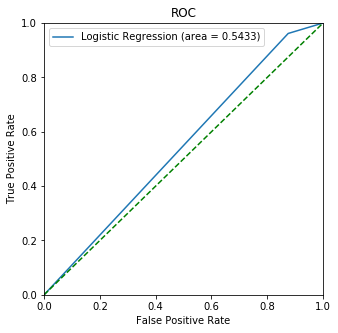

In [25]:
#plot Receiver Operating Characteristic ROC
rocPlot(Y_v, pred_clf)